In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = 'data/exoplanets.csv'
try:
  df = pd.read_csv(file_path)
  print(f"Successfully loaded {file_path}")
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file was not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")

Successfully loaded data/exoplanets.csv


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [22]:
df.kepler_name.unique()

array(['Kepler-227 b', 'Kepler-227 c', nan, ..., 'Kepler-445 d',
       'Kepler-452 b', 'Kepler-1629 b'], shape=(2360,), dtype=object)

# Task
Analyze and visualize the data from the "exoplanet.csv" file, including data cleaning and generating helpful graphs.

## Inspect the data

### Subtask:
Check for missing values, duplicates, and data types to understand the cleaning needed.


**Reasoning**:
Display the number of missing values, duplicate rows, and data types to understand the cleaning needed.



In [5]:
print("Missing values per column:")
display(df.isnull().sum())

print("\nNumber of duplicate rows:")
display(df.duplicated().sum())

print("\nData types of each column:")
display(df.dtypes)

Missing values per column:


kepid                   0
kepoi_name              0
kepler_name          7205
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er


Number of duplicate rows:


np.int64(0)


Data types of each column:


kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_teq_err1         float64
koi_teq_err2         float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr 

## Clean the data

### Subtask:
Handle missing values and duplicates as necessary based on the inspection.


**Reasoning**:
Drop the specified columns with a high number of missing values as instructed.



In [6]:
columns_to_drop = [
    'kepler_name', 'koi_score', 'koi_period_err1', 'koi_period_err2',
    'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
    'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
    'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
    'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
    'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
    'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag'
]
df = df.drop(columns=columns_to_drop)
display(df.head())

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_duration,ra,dec
0,10797460,K00752.01,CONFIRMED,CANDIDATE,0,0,0,0,9.488036,170.538750,2.95750,291.93423,48.141651
1,10797460,K00752.02,CONFIRMED,CANDIDATE,0,0,0,0,54.418383,162.513840,4.50700,291.93423,48.141651
2,10811496,K00753.01,CANDIDATE,CANDIDATE,0,0,0,0,19.899140,175.850252,1.78220,297.00482,48.134129
3,10848459,K00754.01,FALSE POSITIVE,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,2.40641,285.53461,48.285210
4,10854555,K00755.01,CONFIRMED,CANDIDATE,0,0,0,0,2.525592,171.595550,1.65450,288.75488,48.226200


In [7]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

print("\nValue counts for 'koi_disposition':")
display(df['koi_disposition'].value_counts())

Descriptive statistics for numerical columns:


,kepid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_duration,ra,dec
count,9.564000e+03,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000
mean,7.690628e+06,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,5.621606,292.060163,43.810433
std,2.653459e+06,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.471554,4.766657,3.601243
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,0.052000,279.852720,36.577381
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.437750,288.660770,40.777173
50%,7.906892e+06,0.000000,0.000000,0.000000,0.000000,9.752831,137.224595,3.792600,292.261125,43.677504
75%,9.873066e+06,0.000000,0.000000,0.000000,0.000000,40.715178,170.694603,6.276500,295.859160,46.714611
max,1.293514e+07,465.000000,1.000000,1.000000,1.000000,129995.778400,1472.522306,138.540000,301.720760,52.336010



Value counts for 'koi_disposition':


koi_disposition
FALSE POSITIVE    4840
CANDIDATE         2367
CONFIRMED         2357
Name: count, dtype: int64

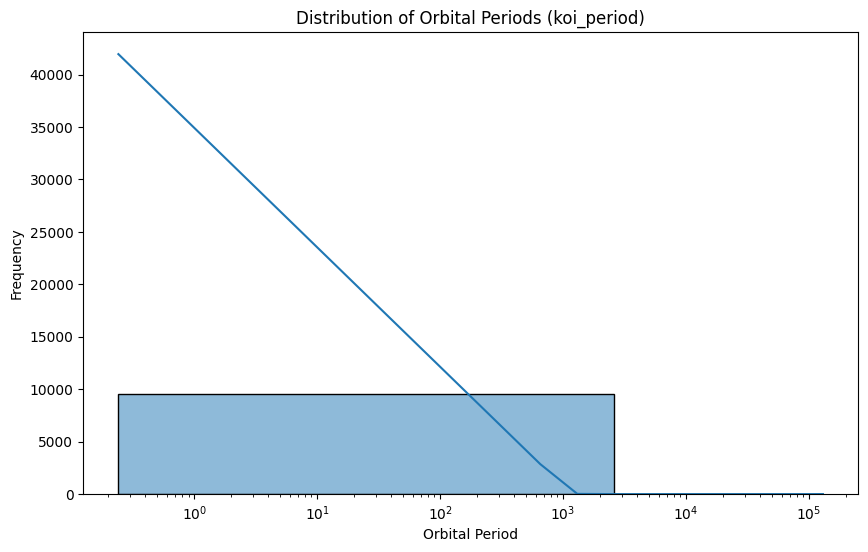

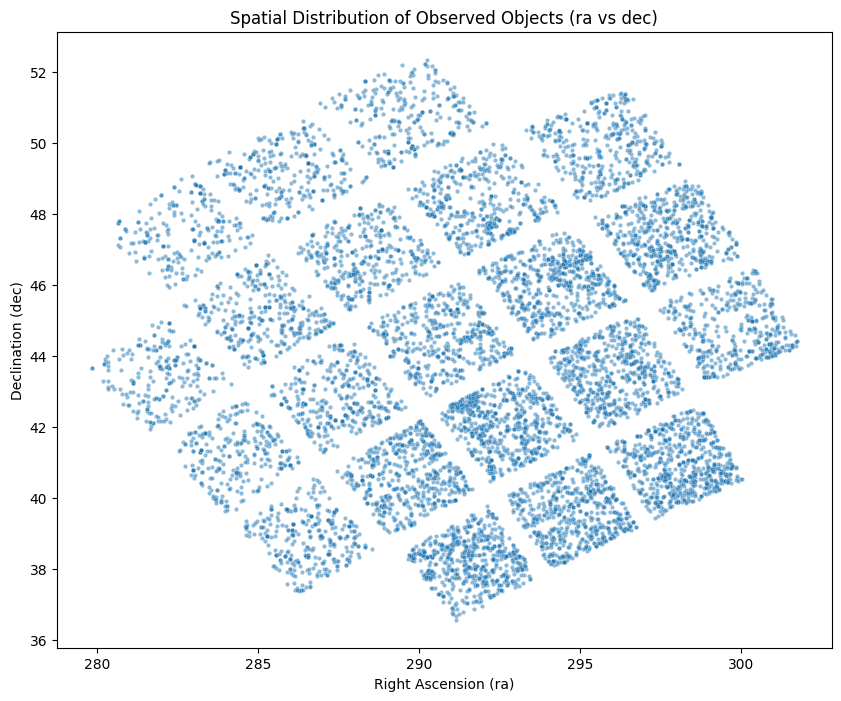

/var/folders/m5/6hcfsflx1bvffnlh961tqmh40000gn/T/ipykernel_78500/2738542207.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='koi_disposition', palette='viridis')


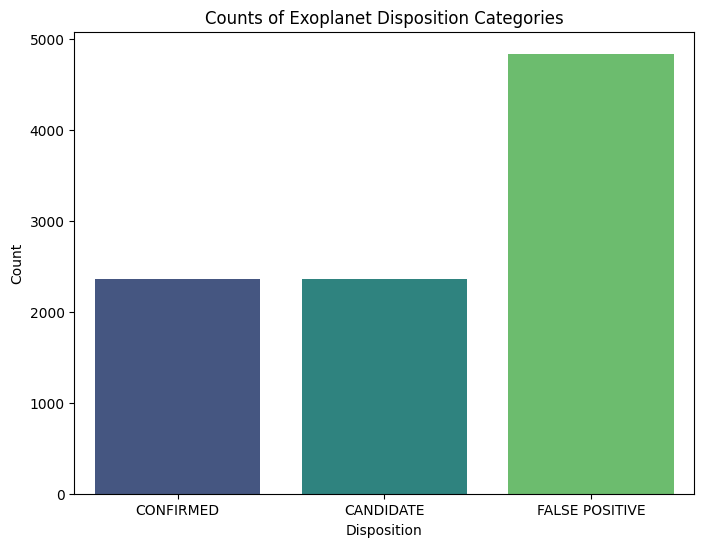

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for 'koi_period'
plt.figure(figsize=(10, 6))
sns.histplot(df['koi_period'], bins=50, kde=True)
plt.title('Distribution of Orbital Periods (koi_period)')
plt.xlabel('Orbital Period')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

# 2. Scatter plot of 'ra' and 'dec'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='ra', y='dec', alpha=0.5, s=10)
plt.title('Spatial Distribution of Observed Objects (ra vs dec)')
plt.xlabel('Right Ascension (ra)')
plt.ylabel('Declination (dec)')
plt.show()

# 3. Bar plot of 'koi_disposition'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='koi_disposition', palette='viridis')
plt.title('Counts of Exoplanet Disposition Categories')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Several columns in the dataset have a significant number of missing values, requiring imputation or removal.
*   There are no duplicate rows in the dataset.
*   The dataset contains three exoplanet disposition categories: 'FALSE POSITIVE', 'CANDIDATE', and 'CONFIRMED', with a higher count of 'FALSE POSITIVE' observations.
*   The distribution of orbital periods ('koi\_period') is heavily skewed towards shorter periods.

### Insights or Next Steps

*   Consider exploring methods to handle missing values in a more nuanced way, such as imputation, for columns that were dropped but might contain valuable information.
*   Focus further analysis on the 'CANDIDATE' and 'CONFIRMED' exoplanets to understand their characteristics and distinguish them from 'FALSE POSITIVE' observations.


# Task
Analyze the "exoplanet.csv" dataset to build an efficient exoplanet finder model using machine learning. Clean the data, perform exploratory data analysis with visualizations, prepare the data for training, select and train a suitable classification model, evaluate its performance, and interpret the results to identify key features for exoplanet detection.

## Prepare the data for machine learning

### Subtask:
Select relevant features, handle categorical variables, and split the data into training and testing sets.


**Reasoning**:
Define features (X) and target (y), identify and encode categorical variables, and split data into training and testing sets.



In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7651, 9574)
Shape of X_test: (1913, 9574)
Shape of y_train: (7651,)
Shape of y_test: (1913,)


## Choose a machine learning model

### Subtask:
Select an appropriate model for classification (distinguishing between 'CONFIRMED', 'CANDIDATE', and 'FALSE POSITIVE').


**Reasoning**:
Explain the reasoning for choosing a classification model and mention a suitable algorithm.



In [10]:
# Reasoning for model selection:
# This task is a multi-class classification problem where the goal is to predict one of three categories: 'CONFIRMED', 'CANDIDATE', or 'FALSE POSITIVE'.
# The dataset contains both numerical and categorical features (after one-hot encoding).
# We need a model that can handle this type of data and provide good predictive performance.

# Suitable classification algorithms for this task include:
# 1. Logistic Regression: A simple yet effective linear model for classification. It can be a good baseline.
# 2. Decision Trees / Random Forests: Tree-based methods can capture non-linear relationships and interactions between features. Random Forests, an ensemble method, are generally more robust and less prone to overfitting than single Decision Trees.
# 3. Gradient Boosting Machines (e.g., XGBoost, LightGBM): These are powerful ensemble methods that often achieve high accuracy by iteratively building trees.
# 4. Support Vector Machines (SVM): Can be effective for classification, especially with non-linear kernels, but can be computationally expensive on large datasets.
# 5. K-Nearest Neighbors (KNN): A simple instance-based learning algorithm.

# Considering the size of the dataset and the potential complexity of the relationships between features,
# ensemble methods like Random Forests or Gradient Boosting Machines are often good choices.
# Logistic Regression could serve as a solid baseline model.

# For this task, we will proceed with Random Forest Classifier as a suitable model.
# It's a robust algorithm that handles various data types well and is generally less sensitive to feature scaling.

## Train the model

### Subtask:
Train the selected Random Forest Classifier model using the prepared training data (`X_train` and `y_train`).


**Reasoning**:
Train the Random Forest Classifier model using the training data.



In [11]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
model = RandomForestClassifier(random_state=42) # Added random_state for reproducibility

# Train the model
model.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


## Evaluate the model

### Subtask:
Assess the performance of the trained Random Forest Classifier model using appropriate metrics on the test data (`X_test` and `y_test`).


**Reasoning**:
Assess the performance of the trained Random Forest Classifier model using appropriate metrics on the test data.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.8207
Precision: 0.8222
Recall: 0.8207
F1-score: 0.8194

Confusion Matrix:


array([[275, 209,   0],
       [132, 356,   2],
       [  0,   0, 939]])

## Tune the model

### Subtask:
Optimize the Random Forest Classifier model's hyperparameters to improve performance.


**Reasoning**:
Optimize the Random Forest Classifier model's hyperparameters using GridSearchCV to improve performance.



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Using 3-fold cross-validation for efficiency
                           scoring='accuracy',
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters found:")
display(best_params)

# Evaluate the best model on the test data
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("\nEvaluation metrics for the tuned model:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"F1-score: {f1_tuned:.4f}")

Best hyperparameters found:


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}


Evaluation metrics for the tuned model:
Accuracy: 0.8217
Precision: 0.8238
Recall: 0.8217
F1-score: 0.8200


In [16]:
# Save the trained model to a file
import joblib
joblib.dump(model, '/Users/aditya/Desktop/Hackathon/A-World-Away-Hunting-for-Exoplanets-with-AI/backend/exoplanet_model_ML_RF.pkl')

['/Users/aditya/Desktop/Hackathon/A-World-Away-Hunting-for-Exoplanets-with-AI/backend/exoplanet_model_ML_RF.pkl']

In [17]:
# load the trained model from a file
import joblib
model_ml = joblib.load('/Users/aditya/Desktop/Hackathon/A-World-Away-Hunting-for-Exoplanets-with-AI/backend/exoplanet_model_ML.pkl')

/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf-gpu/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [19]:
print(model_ml.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [24]:
# Save the training columns
import json
with open('/Users/aditya/Desktop/Hackathon/A-World-Away-Hunting-for-Exoplanets-with-AI/backend/training_columns.json', 'w') as f:
    json.dump(X_train.columns.tolist(), f)